#1. Motivación del proyecto de ML

Las especies a menudo se consideran unidades básicas de diversidad biológica en ecología, evolución, biogeografía y biología de la conservación (Jiménez et al 2020); la intervención de la mano del hombre y el cambio climático global está afectando el ecosistema de los páramos en Colombia y en general del territorio suramericano, esto está generando que un familia de plantas que tiene gran predominio en estos terrenos y que  además sirven como medio de tratamiento del agua y retención de minerales en el suelo, que tienen funciones como la evapotranspiración y la retención del carbono orgánico en el suelo,  la espeletia o mayormente conocida como frailejón, esté teniendo una transformación de características debido al cambio de temperaturas en el medio ambiente que se encuentra,  al ser tan dependiente del hábitat en que se encuentra, un cambio en su ecosistema podría tener como consecuencia la extinción de varias especies.

La necesidad de distinguir el ecosistema en donde se trabaja genera la necesidad de identificar las diferentes especies que componen el ecosistema, para el estudio de caso, dado el predominio de la espeletia en los páramos, es de gran importancia identificar esas diferentes especies y sus características morfológicas.

a. ¿Cuál es el problema específico de ML que se quiere resolver?

Se tiene una base de datos compuesta por imágenes de tres especies de freilejón tomadas del páramo del Sumapaz, en mayor porcentaje se encontró (Jiménez et al 2020): 
* Espeletia Grandiflora
* Espeletia Argentea
* Espeletia summapacis

Se ha realizado una clasificación fenotípica en (Cuatrecasas 1970), pero esa clasificación se ha realizado de una manera manual hechas por especialistas y ellos han usado diferentes características morfológicas de cada especie de freilejón.

Unas de las caracteísticas sobresalientes en una planta son la hojas, existens diferentes formas, bordes y tipos de venación, esta parte de la planta permite ayudar a la clasificación de la especie al momento del estudio, la caracterización de las hojas es una componenete que distingue bastante bien una buena cantidad de especies de plantas.

El problema de Ml que se quiere resolver es poder automatizar la clasificación de estas especies de frailejones atrás nombradas sin necesidad  

es generar una máquina que clasifique las tres diferentes especies de frailejones ya nombradas usando la morfología foliar de la planta.

b. ¿Cómo este problema se articula con el problema de analítica formulado?

Con los datos obtenidos que fueron las imágenes tomadas, se requiere hacer una estracción de características, para esto se debe hacer un preporcesamiento de cada imagen.
La parte funcdamental del proceso es separar las hojas del fondo y separarlas como únicos objetos en una imagen para poder realizar la extracción de las características.



#2. Definición del problema
a. ¿Cuál es la salida específica que se va a predecir?

La salida específica del ML es la especie de la planta, las opciones son:
* Espeletia Grandiflora
* Espeletia Argentea
* Espeletia summapacis

b. ¿Cuáles son los datos de entrada requeridos para el proceso de analítica?
Los espacios de careacterísticas serán dos

como segunda etapa sigue la extracción de características, se obtendrán 3 distintos representantes de cada imagen: 


* Los P-descriptores de Fourier, consisten en los 20 armónicos de menor frecuencia del contorno de cada hoja, los cuales se obtendrán a traves de la transformada discreta de Fourier según (Victorino y Gómez 2016) junto con la razón entre los semiejes.

* Momentos de Hu: Caracterizadores de imágenes según 
Las primeras características a usar serán los armónicos de menor frecuencia para describir las hojas según (Burguer M y W  2009) junto con la razón entre los semiejes.


c. Descripción:

* Son 314 imágenes, de las cuales ahy un desbalance dado que hay más etiquetas representativas de la especie summapacis y menos de la  grandiflora, sin embargo la diferencia no es muy notoria pero al haber pocos datos quizás haya un sesgo significativo al momento aplicar el algoritmo:

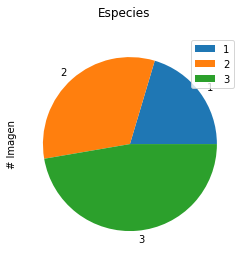


d. ¿Cuáles son los factores más relevantes que permitirían predecir la salida?
Como las imágenes pueden ser inscritas en una elipse es posible obtener características de las elipses que pueden permitir una buena caracterización, a demás los armónicos de los P-descriptores de Fourier que también son otros descriptores que permiten distinguir los contornos  y se espera que estas características sean suficientes para caracterizar cada hoja de cada especie.



#3. Medidas de desempeño

Como marco experimental o línea base, dado que es una clasificación multiclase, los modelos sugeridos son: vecinos más cercanos, bosques aleatorios y árboles de decisión. Según la literatura son modelos bastante apropiados para problemas de clasificación multiclase (Zhang et al 2016) y (Van del Poel 2008).

No hay un documento base para esta claisificación pero si para la extracción de una parte de las características, este documento base utliza, un trabajo base se basa en la agrupación de diferentes especies de Espeletia, solo que en este caso las especies son tomadas de diferentes páramos, entre ellos Sumapaz, Chingaza y otros, así las especies son áun más diversas y hay mayor cantidad de clases (Jiménez 2020). 

La medida de desempeño que se tomará en cuenta será la precisión dado que la momento de utlizar el algortimo se espera que se obtenga la menor cantidad de errores, sea cual sea la especie

$$Precision=\frac{TruePred}{Pred}$$

Teniendo en cuenta que los documentos base realian una agurpación y no una clasificación entonces a partir de características bases de construye características que identifiquen o disitingan entre las tres especies escogidas.

El diseño experimental consiste en lo siguiente:

Se extraen las siguientes características:

* Las cracterísticas bases de contorno y forma elíptica: área, perímetro, medidas del eje mayor y del eje menor y la distancia focal de la figura inscrita en una elipse. 

A partir de estos anteriores se extrajeron otras medidas de distinción

$\begin{align*}
R_{1}=&\frac{Perimetro}{Area}\\
R_{2}=&\frac{Eje_{menor}}{Eje_{mayor}}\\
R_{3}=&\frac{Eje_{mayor}}{Perimetro}\\
R_{4}=&\frac{Eje_{menor}}{Perimetro}\\
R_{5}=&\dfrac{\sqrt{Eje_{mayor}^2-Eje_{menor}^2}}{Perimetro}\\
\end{align*}$


Como segunda parte del diseño primero se realiza un análisis de los modelos utilizando el espacio completo, en segunda instancia, del espacio completo se toman todas las posibles parejas, triplas y cuartetos que se puedan conformar a partir de los datos extraidos esto con necesidad de probar con un espacio de baja dimensión para los modelos.



#4. Partición de los datos

Se escoge una partición aletoria con 70% de entrenamiento y 30% de testeo, en este caso se quiere jugar con la toma de características por lo que la partición de los datos no se da en cantidad, sino, en la escogencia de las características para entrenar el modelos después de tomar el 70% de los datos.

En principip se entrenan los 4 modelos propuestos con las 5 características para ver que desempeño se obtiene, sin embargo el proceso consiste en realizar agrupación por parejas, triplas y cuartetos para: en primer lugar reducir la dimensión de características y en segundo lugar distinguir que combinación de características explican o reprentan mejor las imágenes. Con cada combinación se entrenan los 4 modelos y se escoge el que tenga mejor precisión.  

#Bibliografía

* **Pineda Yam, Cortés Andrés, Madriñán Santiago, Jiménez Iván** "*The Nature of Espeletia Species*", 2020.

* **M. F. Cárdenas Agudelo** "*Ecohydrology of páramos in Colombia: Vulnerability to climate change and land use*", Universidad Nacional de Colombia 2016.

* **José Cuatrecasas** "*A systematic study of the subtribe Espeletiinae*", The New York Botanical Garden Press, 1970.

* **Mary Lee Berdugo Lattke, Fabio Gónzalez, J. Orlando Rangel-Ch, Francisco Gómez**  "*P-type based dimensionality reduction for open contours of Colombian Páramo plant species*", Universidad 2016.

* **Burger W., Burger M.** "*Principles of digital image processing*", Springer 2009.

* **Victorino J,Gómez F.** "*Contour analysis for interpretable leaf shape category discovery*", Universidad Central, 2016.

* **Wäldchen J, Mäder P** "*Plant Species Identifcation Using Computer Vision Techniques: A Systematic Literature Review*", Springer, 2017.

* **Shichao Zhang,Debo Cheng, Ming Zong,Lianli Gao** "*Self-representation nearest neighbor search for classification*" University of Electronic Science and Technology of China, Chengdu, China, 2016.

* **Van den Poel D.** "*Random  Forests  formulticlass  classification:   Random  MultiNomial  Logit*", Department of Marketing at Ghent University, Ghent,Belgium,2008.

* **Pineda Yam, Cortés Andrés, Madriñán Santiago,  Jiménez Iván** "*The  Nature  of  Espeletia  Species*" ,2020.